In [1]:
import librosa
import math
import numpy as np
import pickle
import matplotlib.pyplot as plt

from keras.layers import CuDNNLSTM,Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam

from tensorflow.examples.tutorials.mnist import input_data

Using TensorFlow backend.


# Problem 1

## Loading data and creating a standard linear model

In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
input_shape = mnist.train.images.shape[1]
num_classes = mnist.train.labels.shape[1]
batch_size = 128
epochs = 20

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
model = Sequential()
model.add(Dense(1024, activation='relu',input_shape=(input_shape,), kernel_initializer='glorot_normal'))
model.add(Dense(1024, activation='relu', kernel_initializer='glorot_normal'))
model.add(Dense(1024, activation='relu', kernel_initializer='glorot_normal'))
model.add(Dense(1024, activation='relu', kernel_initializer='glorot_normal'))
model.add(Dense(1024, activation='relu', kernel_initializer='glorot_normal'))
model.add(Dense(num_classes, activation='softmax'))

In [4]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10250     
Total params: 5,012,490
Trainable params: 5,012,490
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

model.fit(mnist.train.images, mnist.train.labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(mnist.validation.images, mnist.validation.labels))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 4s 81us/step - loss: 0.2438 - acc: 0.9270 - val_loss: 0.1200 - val_acc: 0.9632
Epoch 2/20
55000/55000 [==============================] - 3s 52us/step - loss: 0.1003 - acc: 0.9712 - val_loss: 0.1032 - val_acc: 0.9702
Epoch 3/20
55000/55000 [==============================] - 3s 54us/step - loss: 0.0737 - acc: 0.9785 - val_loss: 0.0800 - val_acc: 0.9780
Epoch 4/20
55000/55000 [==============================] - 3s 53us/step - loss: 0.0603 - acc: 0.9831 - val_loss: 0.1155 - val_acc: 0.9728
Epoch 5/20
55000/55000 [==============================] - 3s 52us/step - loss: 0.0449 - acc: 0.9870 - val_loss: 0.1202 - val_acc: 0.9756
Epoch 6/20
55000/55000 [==============================] - 3s 52us/step - loss: 0.0505 - acc: 0.9859 - val_loss: 0.1030 - val_acc: 0.9784
Epoch 7/20
55000/55000 [=========

In [6]:
model.evaluate(mnist.test.images, mnist.test.labels)

10000/10000 [==============================] - 0s 47us/step


[0.08901699159120663, 0.9847]

## Getting the weights and bias of all six layers

In [7]:
w1 =  model.layers[0].get_weights()[0]
w2 =  model.layers[1].get_weights()[0]
w3 =  model.layers[2].get_weights()[0]
w4 =  model.layers[3].get_weights()[0]
w5 =  model.layers[4].get_weights()[0]
w6 =  model.layers[5].get_weights()[0]

b1 =  model.layers[0].get_weights()[1]
b2 =  model.layers[1].get_weights()[1]
b3 =  model.layers[2].get_weights()[1]
b4 =  model.layers[3].get_weights()[1]
b5 =  model.layers[4].get_weights()[1]
b6 =  model.layers[5].get_weights()[1]

## getting U, S, & V via using SVD from numpy

In [8]:
u1, s1, v1 = np.linalg.svd(w1, full_matrices=False)
u2, s2, v2 = np.linalg.svd(w2, full_matrices=False)
u3, s3, v3 = np.linalg.svd(w3, full_matrices=False)
u4, s4, v4 = np.linalg.svd(w4, full_matrices=False)
u5, s5, v5 = np.linalg.svd(w5, full_matrices=False)


## Testing different values of D for our approximation

In [9]:
dnum = [10, 20, 50, 100, 200, input_shape]
results = []
for x in dnum:
    tw1 = np.dot(u1[:,:x], np.dot(np.diag(s1)[:x,:x], v1[:x,:]))
    tw2 = np.dot(u2[:,:x], np.dot(np.diag(s2)[:x,:x], v2[:x,:]))
    tw3 = np.dot(u3[:,:x], np.dot(np.diag(s3)[:x,:x], v3[:x,:]))
    tw4 = np.dot(u4[:,:x], np.dot(np.diag(s4)[:x,:x], v4[:x,:]))
    tw5 = np.dot(u5[:,:x], np.dot(np.diag(s4)[:x,:x], v5[:x,:]))

    model.layers[0].set_weights((tw1,b1))
    model.layers[1].set_weights((tw2,b2))
    model.layers[2].set_weights((tw3,b3))
    model.layers[3].set_weights((tw4,b5))
    model.layers[4].set_weights((tw5,b5))

    results.append(model.evaluate(mnist.test.images, mnist.test.labels)[1])

print(results)

10000/10000 [==============================] - 0s 43us/step
[0.692, 0.9436, 0.9813, 0.9841, 0.9845, 0.9848]


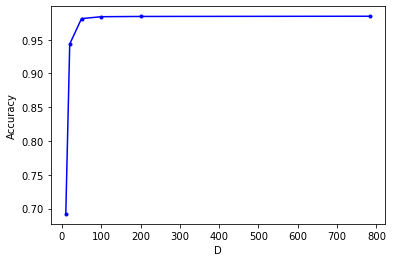

In [10]:
plt.plot(dnum, results, '.b-')
plt.xlabel("D")
plt.ylabel("Accuracy")
plt.show()

## Using D  = 20 

In [11]:
x  = 20

nu1 = u1[:,:x]
nu2 = u2[:,:x]
nu3 = u3[:,:x]
nu4 = u4[:,:x]
nu5 = u5[:,:x]

nv1 = np.dot(np.diag(s1)[:x,:x], v1[:x,:])
nv2 = np.dot(np.diag(s2)[:x,:x], v2[:x,:])
nv3 = np.dot(np.diag(s3)[:x,:x], v3[:x,:])
nv4 = np.dot(np.diag(s4)[:x,:x], v4[:x,:])
nv5 = np.dot(np.diag(s4)[:x,:x], v5[:x,:])


## Converting 5 hidden layer model to 10 hidden layer model with out svd approximations

In [12]:
model3 = Sequential()

#layer 1
model3.add(Dense(20, activation='relu',input_shape=(input_shape,), weights=(nu1,np.zeros(20))))
model3.add(Dense(1024, activation='relu', weights=(nv1,np.zeros(1024))))

#layer 2
model3.add(Dense(20, activation='relu', weights=(nu2,np.zeros(20))))
model3.add(Dense(1024, activation='relu', weights=(nv2,np.zeros(1024))))

#layer 3
model3.add(Dense(20, activation='relu', weights=(nu3,np.zeros(20))))
model3.add(Dense(1024, activation='relu', weights=(nv3,np.zeros(1024))))

#layer 4
model3.add(Dense(20, activation='relu', weights=(nu4,np.zeros(20))))
model3.add(Dense(1024, activation='relu', weights=(nv4,np.zeros(1024))))

#layer 5
model3.add(Dense(20, activation='relu', weights=(nu5,np.zeros(20))))
model3.add(Dense(1024, activation='relu', weights=(nv5,np.zeros(1024))))

#layer 6
model3.add(Dense(num_classes, activation='softmax'))

In [13]:
print(model3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              21504     
_________________________________________________________________
dense_9 (Dense)              (None, 20)                20500     
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              21504     
_________________________________________________________________
dense_11 (Dense)             (None, 20)                20500     
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              21504     
_________________________________________________________________
dense_13 (Dense)             (None, 20)                20500     
__________

In [14]:
model3.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

model3.fit(mnist.train.images, mnist.train.labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(mnist.validation.images, mnist.validation.labels))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 3s 56us/step - loss: 0.2977 - acc: 0.9107 - val_loss: 0.1551 - val_acc: 0.9614
Epoch 2/20
55000/55000 [==============================] - 3s 49us/step - loss: 0.1268 - acc: 0.9660 - val_loss: 0.1396 - val_acc: 0.9650
Epoch 3/20
55000/55000 [==============================] - 3s 50us/step - loss: 0.1030 - acc: 0.9716 - val_loss: 0.1227 - val_acc: 0.9686
Epoch 4/20
55000/55000 [==============================] - 3s 50us/step - loss: 0.0872 - acc: 0.9758 - val_loss: 0.1262 - val_acc: 0.9666
Epoch 5/20
55000/55000 [==============================] - 3s 49us/step - loss: 0.0762 - acc: 0.9782 - val_loss: 0.1306 - val_acc: 0.9702
Epoch 6/20
55000/55000 [==============================] - 3s 50us/step - loss: 0.0721 - acc: 0.9797 - val_loss: 0.1246 - val_acc: 0.9710
Epoch 7/20
55000/55000 [==============================] - 3s 49us/step - loss: 0.0693 - acc: 0.9803 - val_loss: 0.1293 - val_acc:

## We are able to achive great results with only 4% of the original parameters

In [15]:
model3.evaluate(mnist.test.images, mnist.test.labels)

10000/10000 [==============================] - 0s 44us/step


[0.13648687947880753, 0.9714]

# Problem 2

## Defining total files and max len for audio files to be loaded

In [16]:
totalFiles = 1200
max_length = 200  #due to a specific file in the test set
sr = 16000

def getdata(path, str_tr, flag = 0):
    wav = []
    stft_og = []
    stft_aabs = []
    z = ['000', '00', '0', '']
    
    for i in range(totalFiles):
        if (i == 0):
            j = 0
        else:
            j = int(math.log10(i))
        
        s, sr = librosa.load(path + str_tr + z[j] + str(i) + '.wav', sr = None)
        if flag ==1:
            wav.append(s)   #This is used in SNR Calculations for validation set
         

        stft = librosa.stft(s, n_fft= 1024, hop_length= 512)
        stft_abs = np.abs(stft) 
        stft_abs = np.pad(stft_abs, ((0,0),(0, max_length-stft.shape[1])), 'constant')
        
        
        stft_og.append(stft)
        stft_aabs.append(stft_abs)

        
    return wav,stft_og, stft_aabs

## The formula to calculate IBM

In [17]:
def IBM(S, N):
    M = []
    for i in range(len(S)):
        m_ibm = 1 * (S[i] > N[i])
        M.append(m_ibm) 
    return M

## I have saved the train data to a pickle file so I do not need to process it every time

In [19]:
%%time
if False:
    path = "timit-homework/tr/"
    trx, X, X_abs = getdata(path, 'trx')  #Train X
    trs, S, S_abs = getdata(path, 'trs')  #clean x
    trn, N, N_abs = getdata(path, 'trn') #noise  
    
    M = IBM(S_abs, N_abs) #binary mask
    
    x_train = np.array(X_abs).swapaxes(1,2)
    y_train  = np.array(M).swapaxes(1,2)
    
    with open('train.pkl', 'wb') as f: 
        pickle.dump([x_train, y_train], f)
else:
    with open('train.pkl','rb') as f:  
        x_train, y_train = pickle.load(f)

Wall time: 1.4 s


## Creating a LSTM model with a dropout and Dense Layer

In [20]:
model = Sequential()
model.add(CuDNNLSTM(units=256, return_sequences=True
               ,kernel_initializer = 'glorot_normal'
               , input_shape=(None,513)))
model.add(Dropout(0.05))
model.add(Dense(units=513, activation="sigmoid"))
lr = 0.001
opt = Adam(lr= lr)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_1 (CuDNNLSTM)     (None, None, 256)         789504    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
dense_18 (Dense)             (None, None, 513)         131841    
Total params: 921,345
Trainable params: 921,345
Non-trainable params: 0
_________________________________________________________________


In [21]:
 model.fit(x_train
          ,y_train
          ,batch_size=10 
          ,epochs=100)

Epoch 1/100
1200/1200 [==============================] - 7s 6ms/step - loss: 0.4249 - acc: 0.7634
Epoch 2/100
1200/1200 [==============================] - 4s 4ms/step - loss: 0.3452 - acc: 0.8212
Epoch 3/100
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3136 - acc: 0.8449
Epoch 4/100
1200/1200 [==============================] - 4s 4ms/step - loss: 0.2937 - acc: 0.8571
Epoch 5/100
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2804 - acc: 0.8658
Epoch 6/100
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2754 - acc: 0.8687
Epoch 7/100
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2620 - acc: 0.8765
Epoch 8/100
1200/1200 [==============================] - 4s 4ms/step - loss: 0.2606 - acc: 0.8785
Epoch 9/100
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2521 - acc: 0.8829
Epoch 10/100
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2481 - acc: 0.8847
Epoch 11/100
1200/1

1200/1200 [==============================] - 4s 3ms/step - loss: 0.1726 - acc: 0.9239
Epoch 83/100
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1713 - acc: 0.9245
Epoch 84/100
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1708 - acc: 0.9248
Epoch 85/100
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1709 - acc: 0.9247
Epoch 86/100
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1705 - acc: 0.9249
Epoch 87/100
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1706 - acc: 0.9249
Epoch 88/100
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1703 - acc: 0.9250
Epoch 89/100
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1701 - acc: 0.9251
Epoch 90/100
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1703 - acc: 0.9250
Epoch 91/100
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1702 - acc: 0.9250
Epoch 92/100
1200/1200 

## I have saved the validation data to a pickle file so I do not need to process it every time

In [48]:
if False:
    path = "timit-homework/v/"
    vx, VX, VX_abs = getdata(path, 'vx', flag = 1)
    vs, VS, VS_abs = getdata(path, 'vs', flag = 1)
    with open('validation.pkl', 'wb') as f: 
        pickle.dump([VX_abs, VX, vs], f)
else:
    with open('validation.pkl','rb') as f:  
        VX_abs, VX, vs = pickle.load(f)

## This is the formula to calculate SNR for the validation set

In [49]:
def calcSnr(pred, X, s):
    pred = 1 * (pred > 0.5)
    pred = pred.T
    s_pred = pred * X
    s_pred = librosa.istft(s_pred, win_length = 1024, hop_length = 512)
    nlen = min(len(s), len(s_pred))
    SNR = 10*math.log10((np.sum(s[:nlen]**2))/(np.sum((s[:nlen] - s_pred[:nlen])**2)))
    return SNR

## SNR is above 10 which is what we were expecting

In [51]:
SNR = np.zeros(1200)
for i in range(len(VX_abs)):
    x_test = VX_abs[i].T[np.newaxis,:,:]
    pred = model.predict(x_test)
    SNR[i] = calcSnr(pred[0,:VX[i].shape[1]], VX[i], vs[i])
print(np.mean(SNR))

10.76603113979991


## I have saved the test data to a pickle file so I do not need to process it every time

In [45]:
if False:
    path = "timit-homework/te/"
    totalFiles = 400
    tex, TEX, TEX_abs = getdata(path, 'tex', flag = 1)
    with open('test.pkl', 'wb') as f: 
        pickle.dump([tex, TEX,  TEX_abs], f)
else:
    with open('test.pkl','rb') as f:  
        tex, TEX,  TEX_abs= pickle.load(f)                   

## Denoising test data and exporting to a final file

In [52]:
def testfinal(pred, X, i):
    pred = 1 * (pred > 0.5)
    pred = pred.T
    s_pred = pred * X
    s_pred = librosa.istft(s_pred, win_length = 1024, hop_length = 512)
    librosa.output.write_wav('timit-homework/results/final' + str(i) + '.wav', s_pred, sr)

In [53]:
for i in range(len(TEX_abs)):
    x_test = TEX_abs[i].T[np.newaxis,:,:]
    pred = model.predict(x_test)
    testfinal(pred[0,:TEX[i].shape[1],:], TEX[i], i)